## Spectral Index - CB4_64_16D_STK_v1

This document presents examples of spectral index calculations in the CBERS4 collection (CB4_64_16D_STK_v1) of the BDC.

> This simple example aims to present how to load the data from the BDC stored inside the ODC. To know all the possible products, use [BDC-STAC](http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0/).

In [4]:
import datacube
dc = datacube.Datacube(app='datacube')

In [5]:
PRODUCT_NAME = "CB4_64_16D_STK_v1"
PRODUCT_FACTOR = 10000

**Load CB4_64_16D_STK_v1 product**

Initially, an entire scene will be loaded, in a range of specific dates

In [6]:
cb4_64_16d_ftile = dc.load(PRODUCT_NAME, measurements = ['red', 'green', 'blue', 'evi', 'nir', 'ndvi'], 
                                            time = ("2019-12-19", "2019-12-31"), resolution = (64, -64))
cb4_64_16d_ftile

<xarray.Dataset>
Dimensions:      (time: 1, x: 31511, y: 34328)
Coordinates:
  * time         (time) datetime64[ns] 2019-12-19
  * y            (y) float64 8.778e+06 8.778e+06 ... 1.098e+07 1.098e+07
  * x            (x) float64 6.307e+06 6.307e+06 6.307e+06 ... 4.29e+06 4.29e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
    green        (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
    blue         (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
    evi          (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
    nir          (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
    ndvi         (time, y, x) int16 -9999 -9999 -9999 ... -9999 -9999 -9999
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

The example will use only a portion of the data that was uploaded. If necessary, in your analysis you can use the whole scene that was uploaded.

In [7]:
cb4_64_16d_stile = cb4_64_16d_ftile.isel(x = slice(0, 1500), y = slice(0, 1500))
cb4_64_16d_stile

<xarray.Dataset>
Dimensions:      (time: 1, x: 1500, y: 1500)
Coordinates:
  * time         (time) datetime64[ns] 2019-12-19
  * y            (y) float64 8.778e+06 8.778e+06 ... 8.874e+06 8.874e+06
  * x            (x) float64 6.307e+06 6.307e+06 ... 6.211e+06 6.211e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 449 441 497 682
    green        (time, y, x) int16 -9999 -9999 -9999 -9999 ... 602 592 677 830
    blue         (time, y, x) int16 -9999 -9999 -9999 -9999 ... 284 268 358 392
    evi          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 5626 6045 5579
    nir          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 3658 3940 4082
    ndvi         (time, y, x) int16 -9999 -9999 -9999 -9999 ... 7848 7759 7136
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

Viewing the selected region

In [9]:
from utils.data_cube_utilities.dc_rgb import rgb

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb65a8e160>)

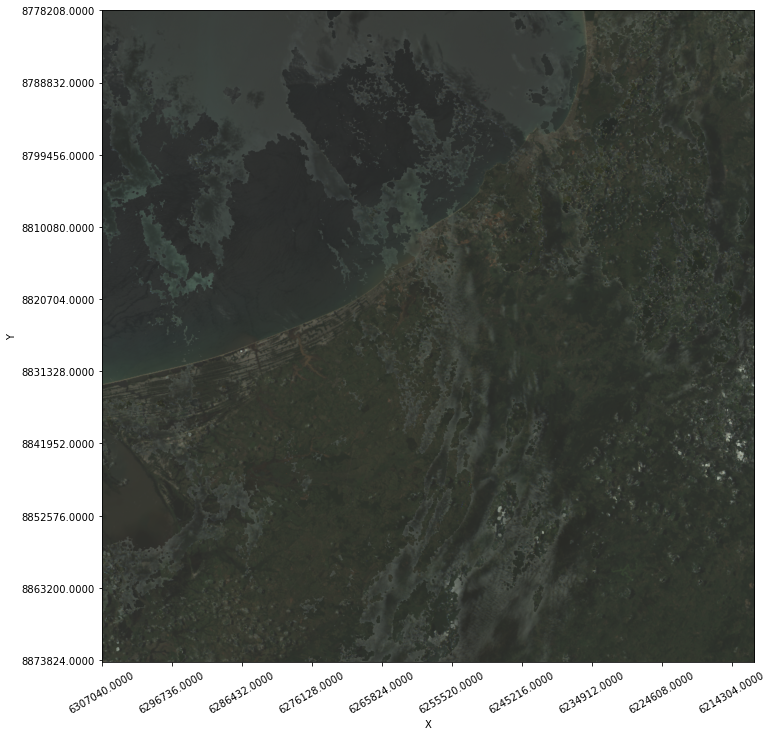

In [10]:
rgb(cb4_64_16d_stile, figsize = (12, 12), x_coord = 'x', y_coord = 'y')

## Spectral Index

In this section, the spectral indices are displayed. Note that some of them are already available inside the BDC products

### NDVI



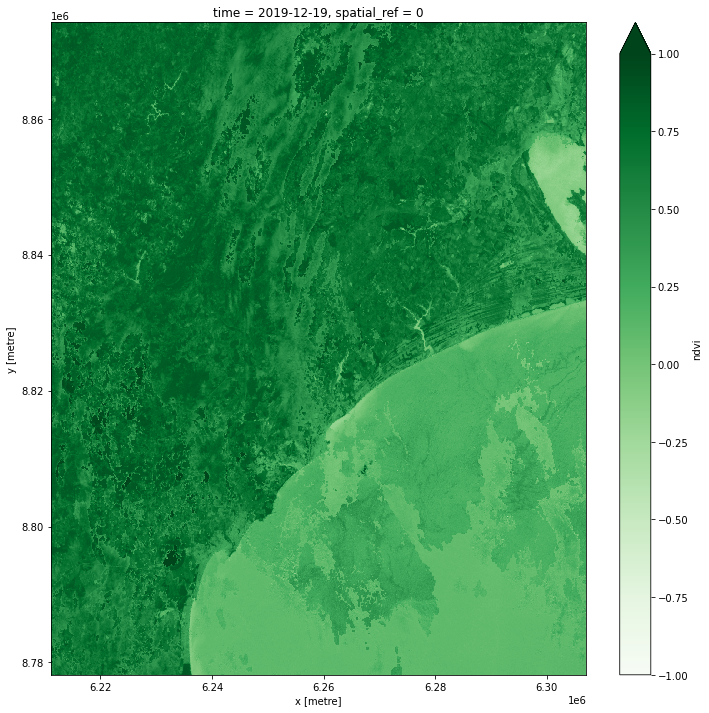

In [11]:
(cb4_64_16d_stile.ndvi / PRODUCT_FACTOR).plot(figsize=(12, 12), cmap = "Greens", vmin=-1.0, vmax=1.0)

### EVI

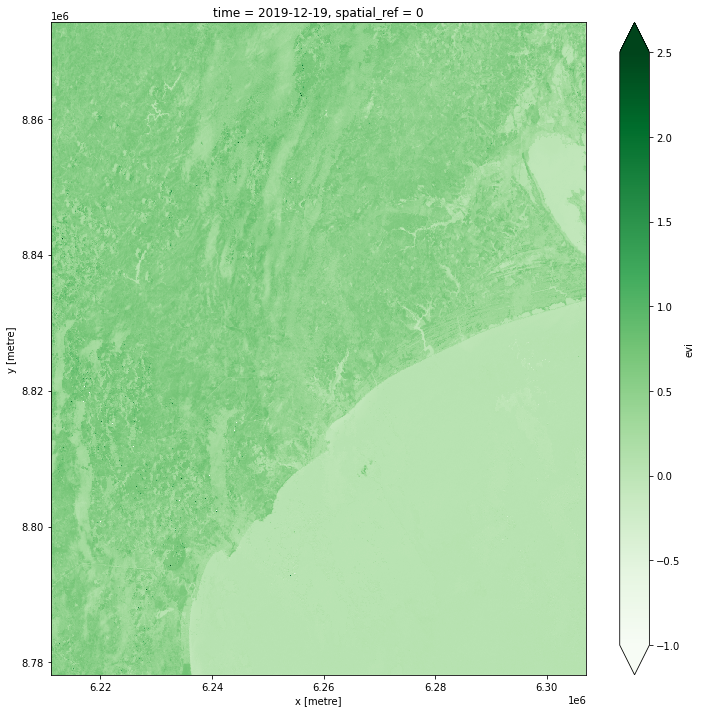

In [12]:
(cb4_64_16d_stile.evi / PRODUCT_FACTOR).plot(figsize=(12, 12), cmap = "Greens", vmin=-1.0, vmax=2.5)

### NDWI

In [13]:
# function to calc ndwi
def ndwi_fnc(dataset):
    return (dataset.green - dataset.nir) / (dataset.green + dataset.nir)

cb4_64_16d_stile_ndwi = ndwi_fnc(cb4_64_16d_stile)

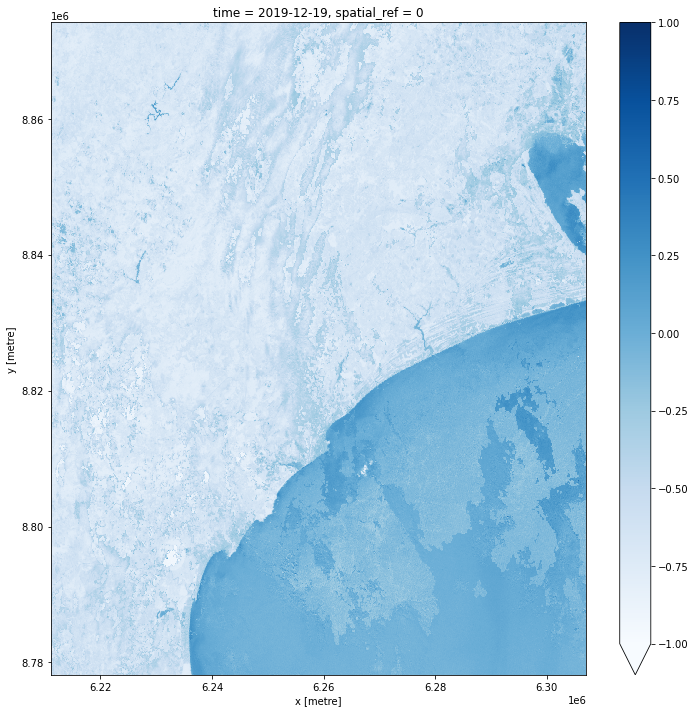

In [14]:
(cb4_64_16d_stile_ndwi).plot(figsize=(12, 12), cmap = "Blues", vmin=-1.0, vmax=1.0)